In [1]:
#Importing required packages.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
%matplotlib inline

ModuleNotFoundError: No module named 'pandas'

In [ ]:
wine = pd.read_csv("/Dataset/winequality-red.csv")

In [6]:
#Checking for empty values

wine.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
#Information about the data columns

wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
#Let's check how the data is distributed

wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:
#Rename Column Names

wine.rename(columns = {"fixed acidity": "fixed_acidity", "volatile acidity": "volatile_acidity",
                    "citric acid": "citric_acid", "residual sugar": "residual_sugar",
                    "chlorides": "chlorides", "free sulfur dioxide": "free_sulfur_dioxide",
                    "total sulfur dioxide": "total_sulfur_dioxide"}, inplace = True)

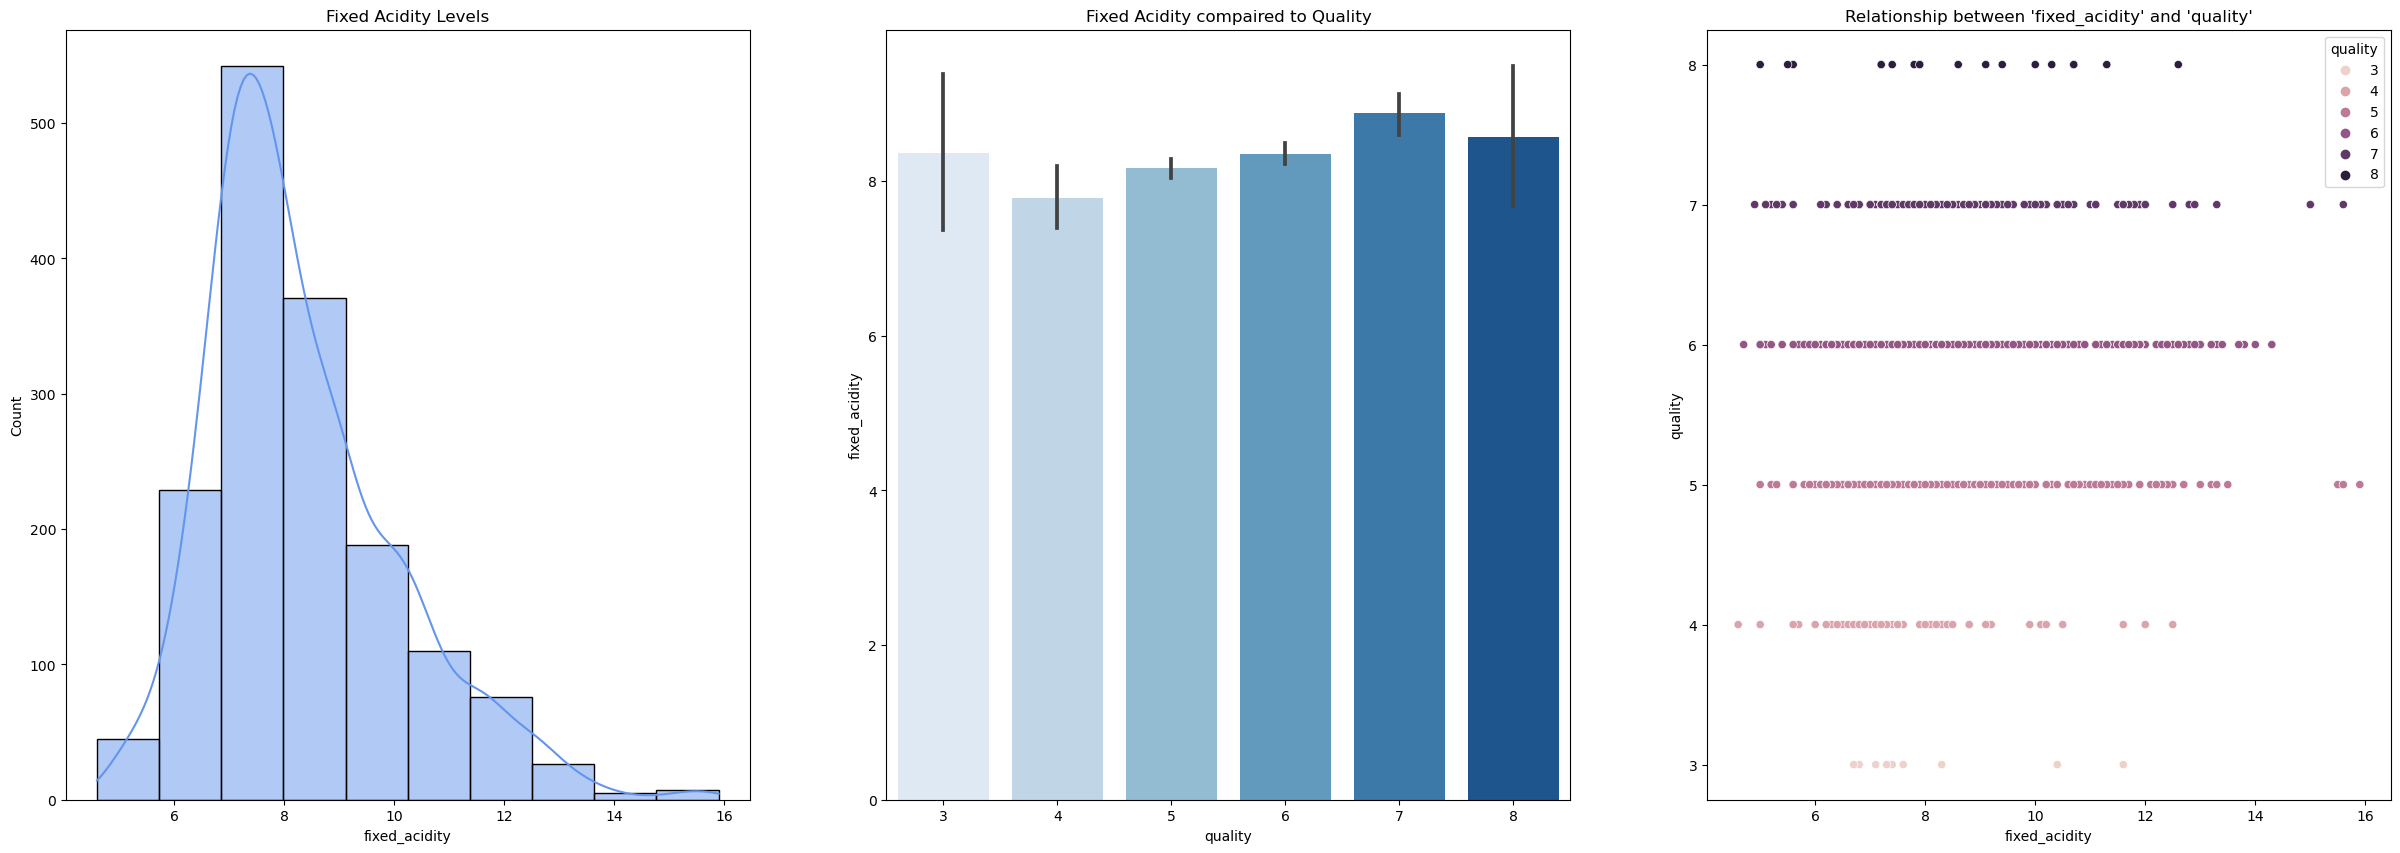

In [10]:
#Fixed Acidity count of distribution levels and when compaired to quality

fig, axes = plt.subplots(1, 3, figsize = (30, 10))

sns.histplot(ax = axes[0], x = wine["fixed_acidity"],
             bins = 10,
             kde = True,
             cbar = True,
             color = "#6495ED").set(title = "Fixed Acidity Levels");

sns.barplot(ax = axes[1], x = 'quality', 
            y = 'fixed_acidity', 
            data = wine , 
            palette = "Blues").set(title = "Fixed Acidity compaired to Quality");

sns.scatterplot(ax = axes[2],
                x = "fixed_acidity",
                y = "quality", hue = "quality",
                data = wine).set(title = "Relationship between 'fixed_acidity' and 'quality'");

#The Fixed Acidity levels does not reveal any specification to classify the wine quality

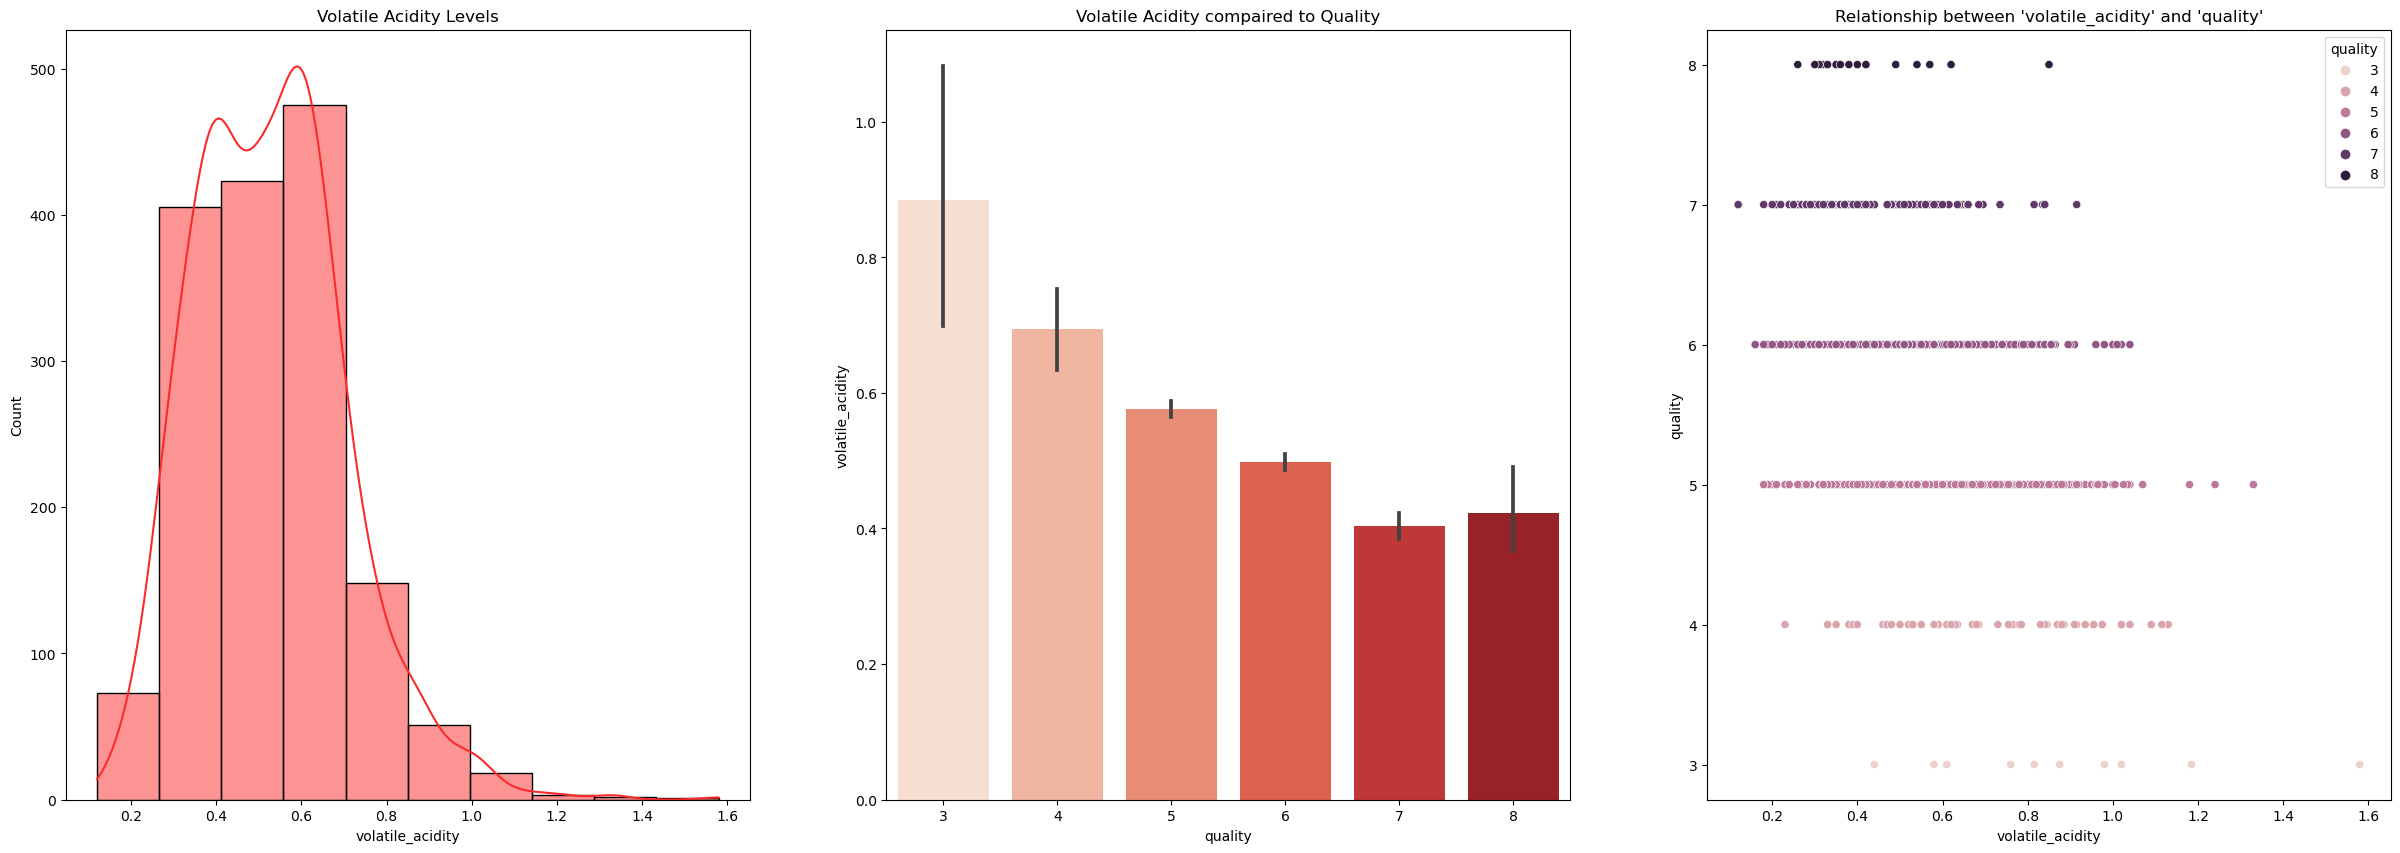

In [11]:
#Volatile Acidity count of distribution levels and when compaired to quality

fig, axes = plt.subplots(1, 3, figsize = (30, 10))

sns.histplot(ax = axes[0], x = wine["volatile_acidity"],
             bins = 10,
             kde = True,
             cbar = True,
             color = "#FC2B2B").set(title = "Volatile Acidity Levels");

sns.barplot(ax = axes[1], x = 'quality', 
            y = 'volatile_acidity', 
            data = wine , 
            palette = "Reds").set(title = "Volatile Acidity compaired to Quality");

sns.scatterplot(ax = axes[2],
                x = "volatile_acidity",
                y = "quality", hue = "quality",
                data = wine).set(title = "Relationship between 'volatile_acidity' and 'quality'");

#The Volatile Acidity levels go lower when wine quality improves

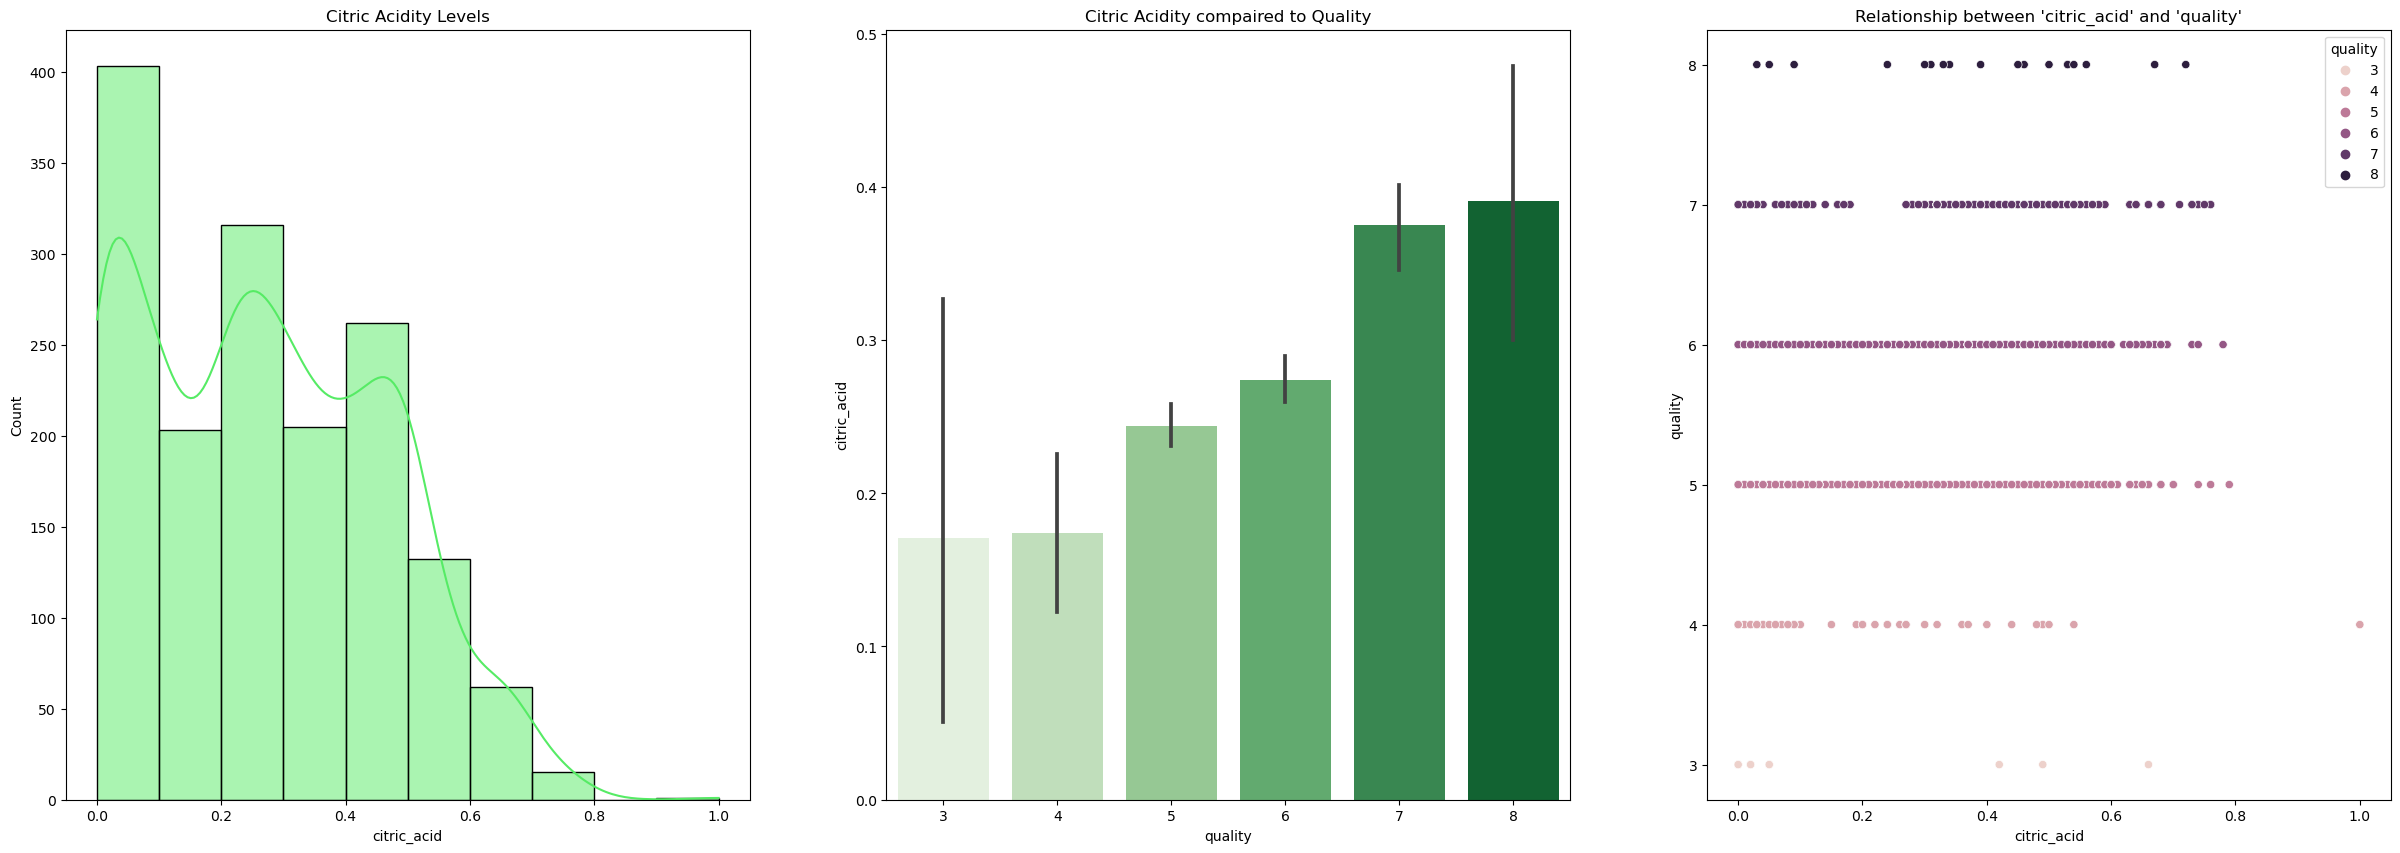

In [12]:
#Citric Acidity count of distribution levels and when compaired to quality

fig, axes = plt.subplots(1, 3, figsize = (30, 10))

sns.histplot(ax = axes[0], x = wine["citric_acid"],
             bins = 10,
             kde = True,
             cbar = True,
             color = "#56EB65").set(title = "Citric Acidity Levels");

sns.barplot(ax = axes[1], x = 'quality', 
            y = 'citric_acid', 
            data = wine , 
            palette = "Greens").set(title = "Citric Acidity compaired to Quality");

sns.scatterplot(ax = axes[2],
                x = "citric_acid",
                y = "quality", hue = "quality",
                data = wine).set(title = "Relationship between 'citric_acid' and 'quality'");

#The Citric Acidity levels go higher with the wine quality

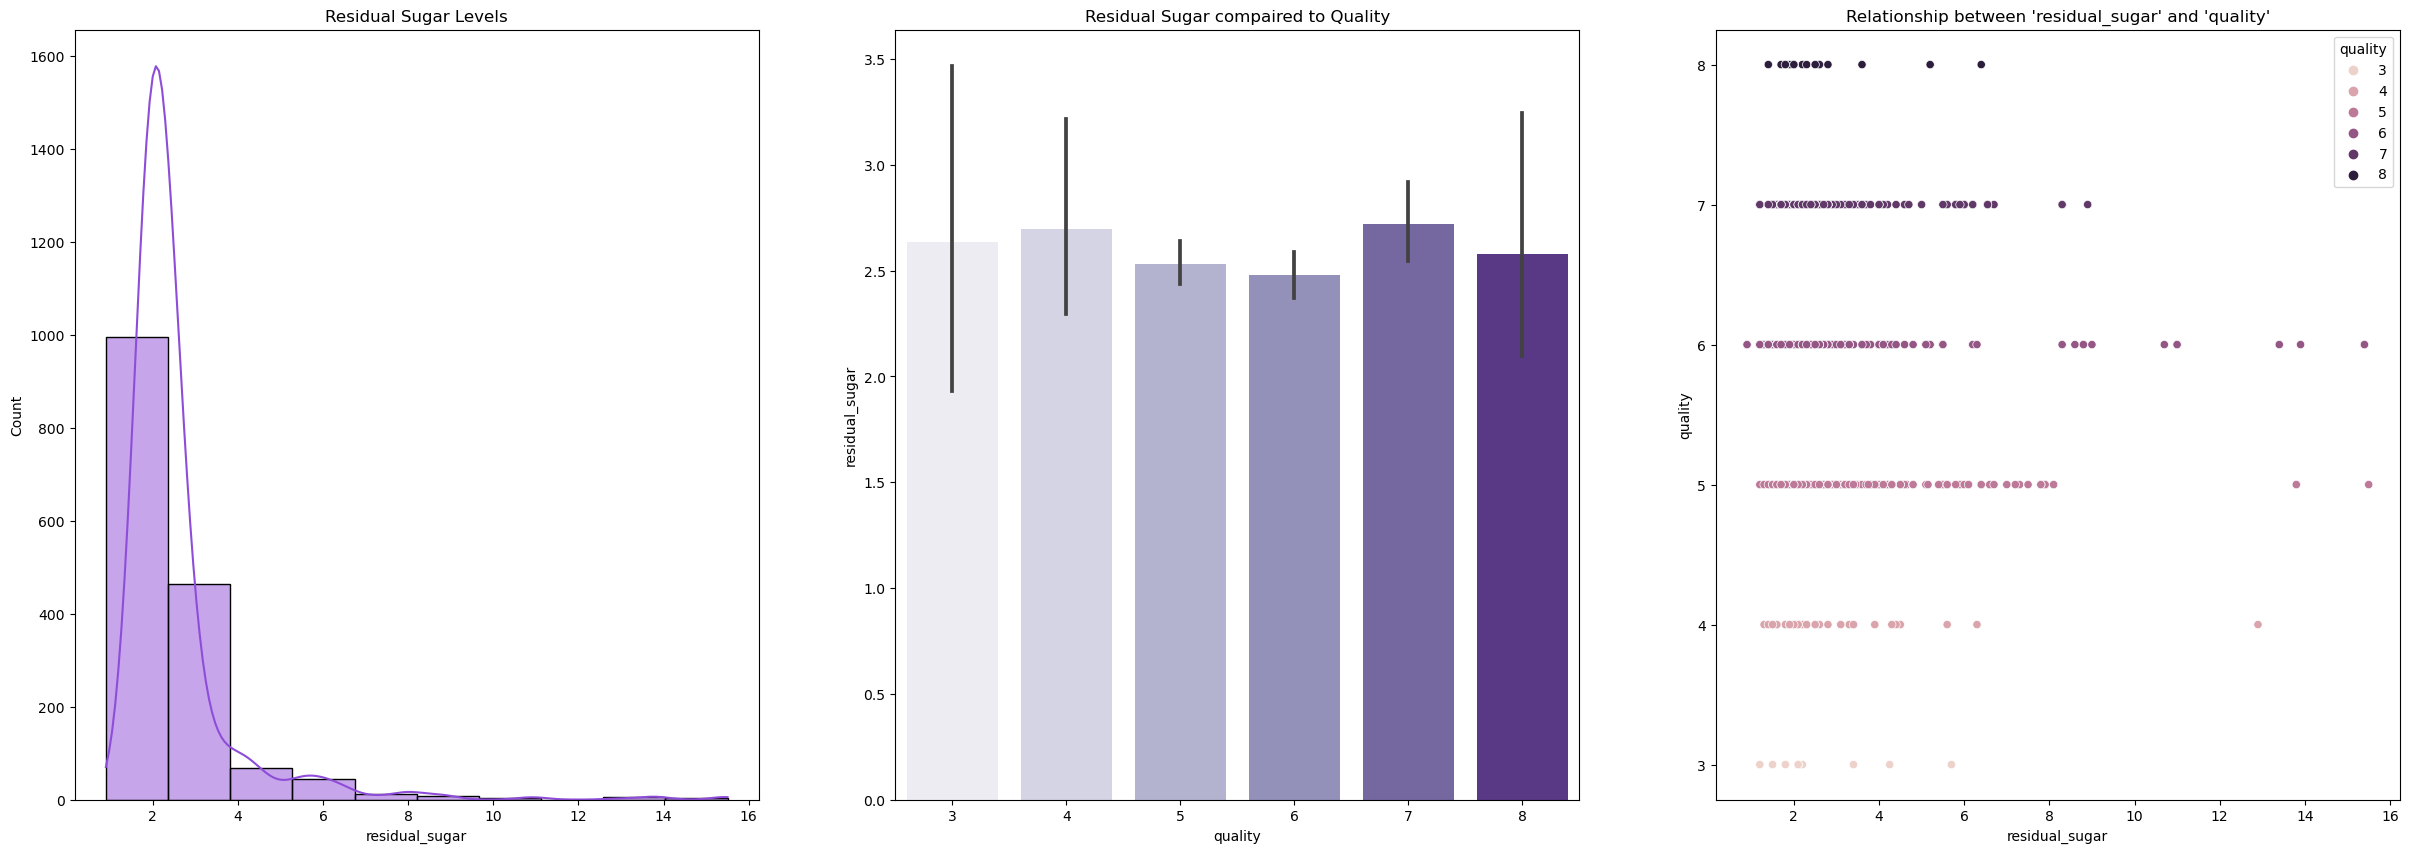

In [13]:
#Residual Sugar count of distribution levels and when compaired to quality

fig, axes = plt.subplots(1, 3, figsize = (30, 10))

sns.histplot(ax = axes[0], x = wine['residual_sugar'],
             bins = 10,
             kde = True,
             cbar = True,
             color = "#8E4DD8").set(title = "Residual Sugar Levels");

sns.barplot(ax = axes[1], x = 'quality', 
            y = 'residual_sugar', 
            data = wine , 
            palette = "Purples").set(title = "Residual Sugar compaired to Quality");

sns.scatterplot(ax = axes[2],
                x = "residual_sugar",
                y = "quality", hue = "quality",
                data = wine).set(title = "Relationship between 'residual_sugar' and 'quality'");

#The Citric Acidity levels does not reveal any specification to classify the wine quality

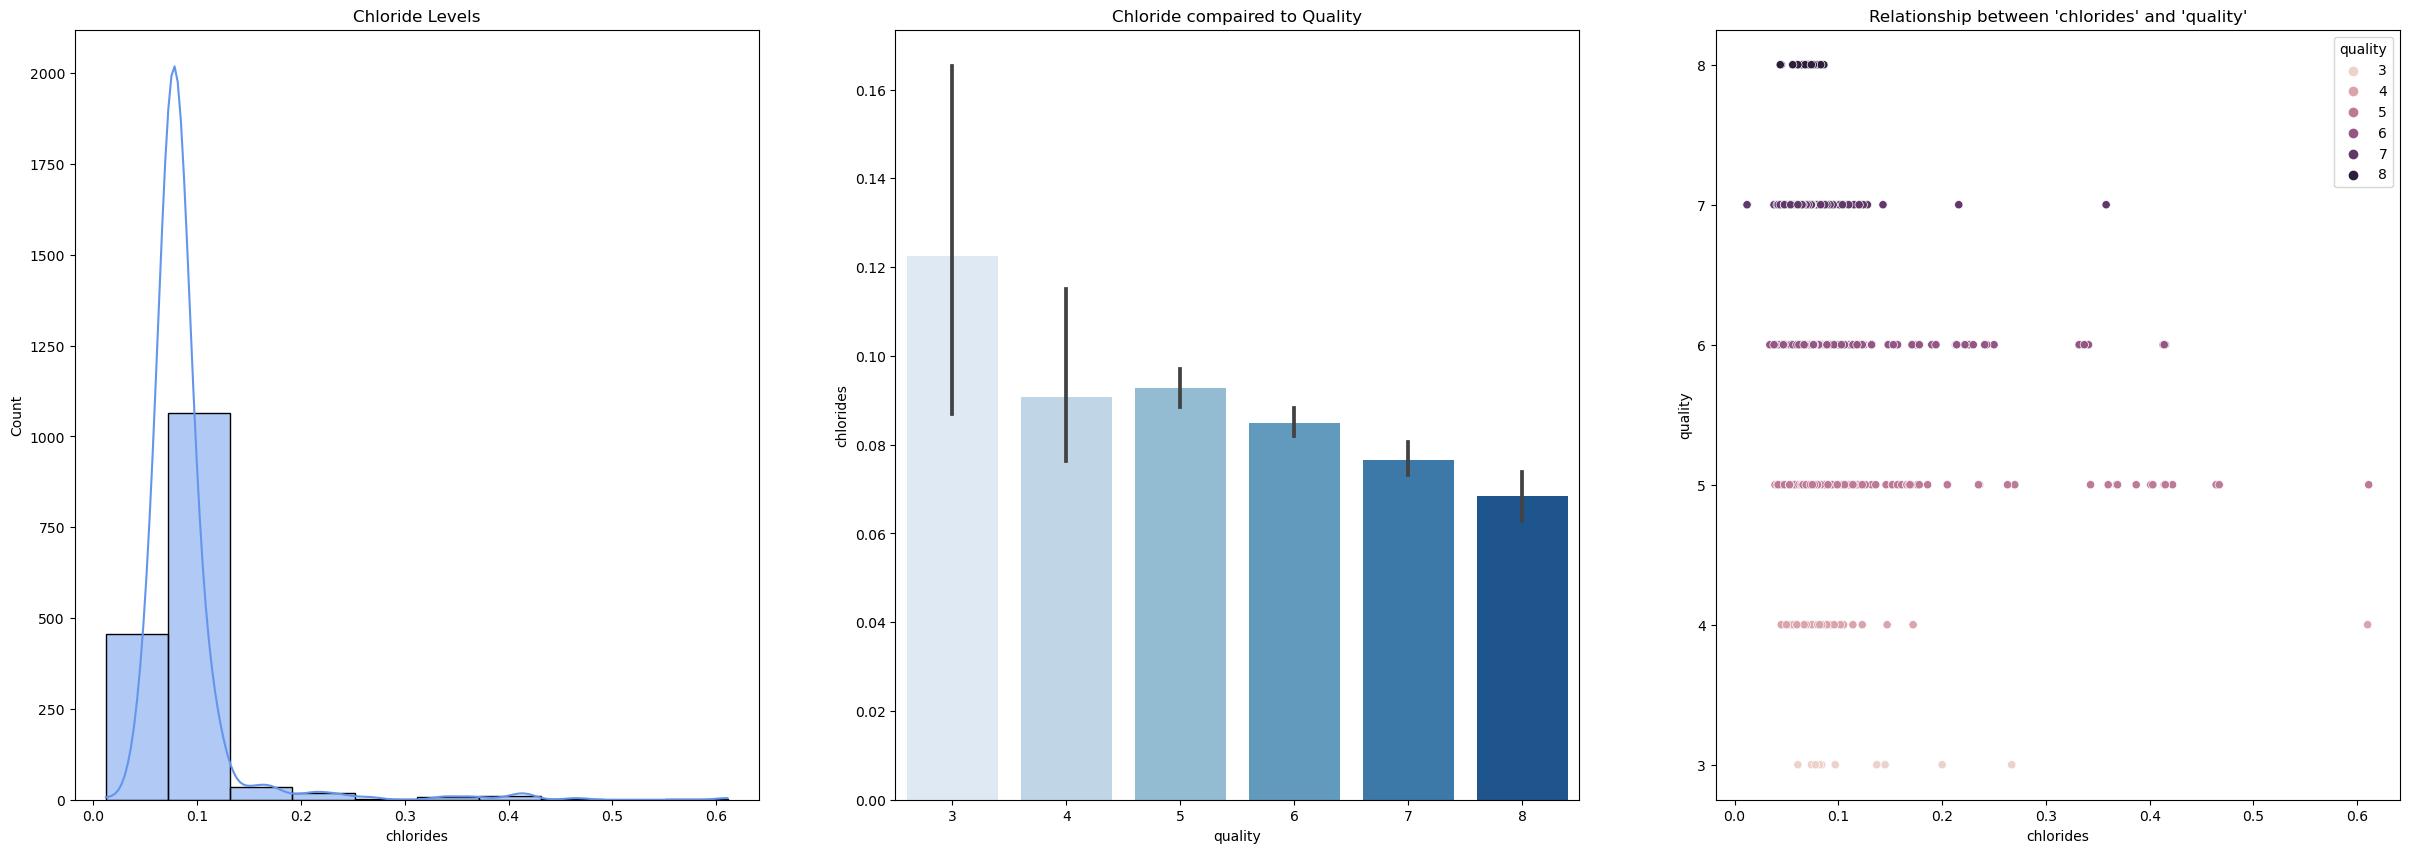

In [14]:
#Chloride count of distribution levels and when compaired to quality

fig, axes = plt.subplots(1, 3, figsize = (30, 10))

sns.histplot(ax = axes[0], x = wine['chlorides'],
             bins = 10,
             kde = True,
             cbar = True,
             color = "#6495ED").set(title = "Chloride Levels");

sns.barplot(ax = axes[1], x = 'quality', 
            y = 'chlorides', 
            data = wine , 
            palette = "Blues").set(title = "Chloride compaired to Quality");

sns.scatterplot(ax = axes[2],
                x = "chlorides",
                y = "quality", hue = "quality",
                data = wine).set(title = "Relationship between 'chlorides' and 'quality'");

#The Chloride levels go lower with the wine quality 

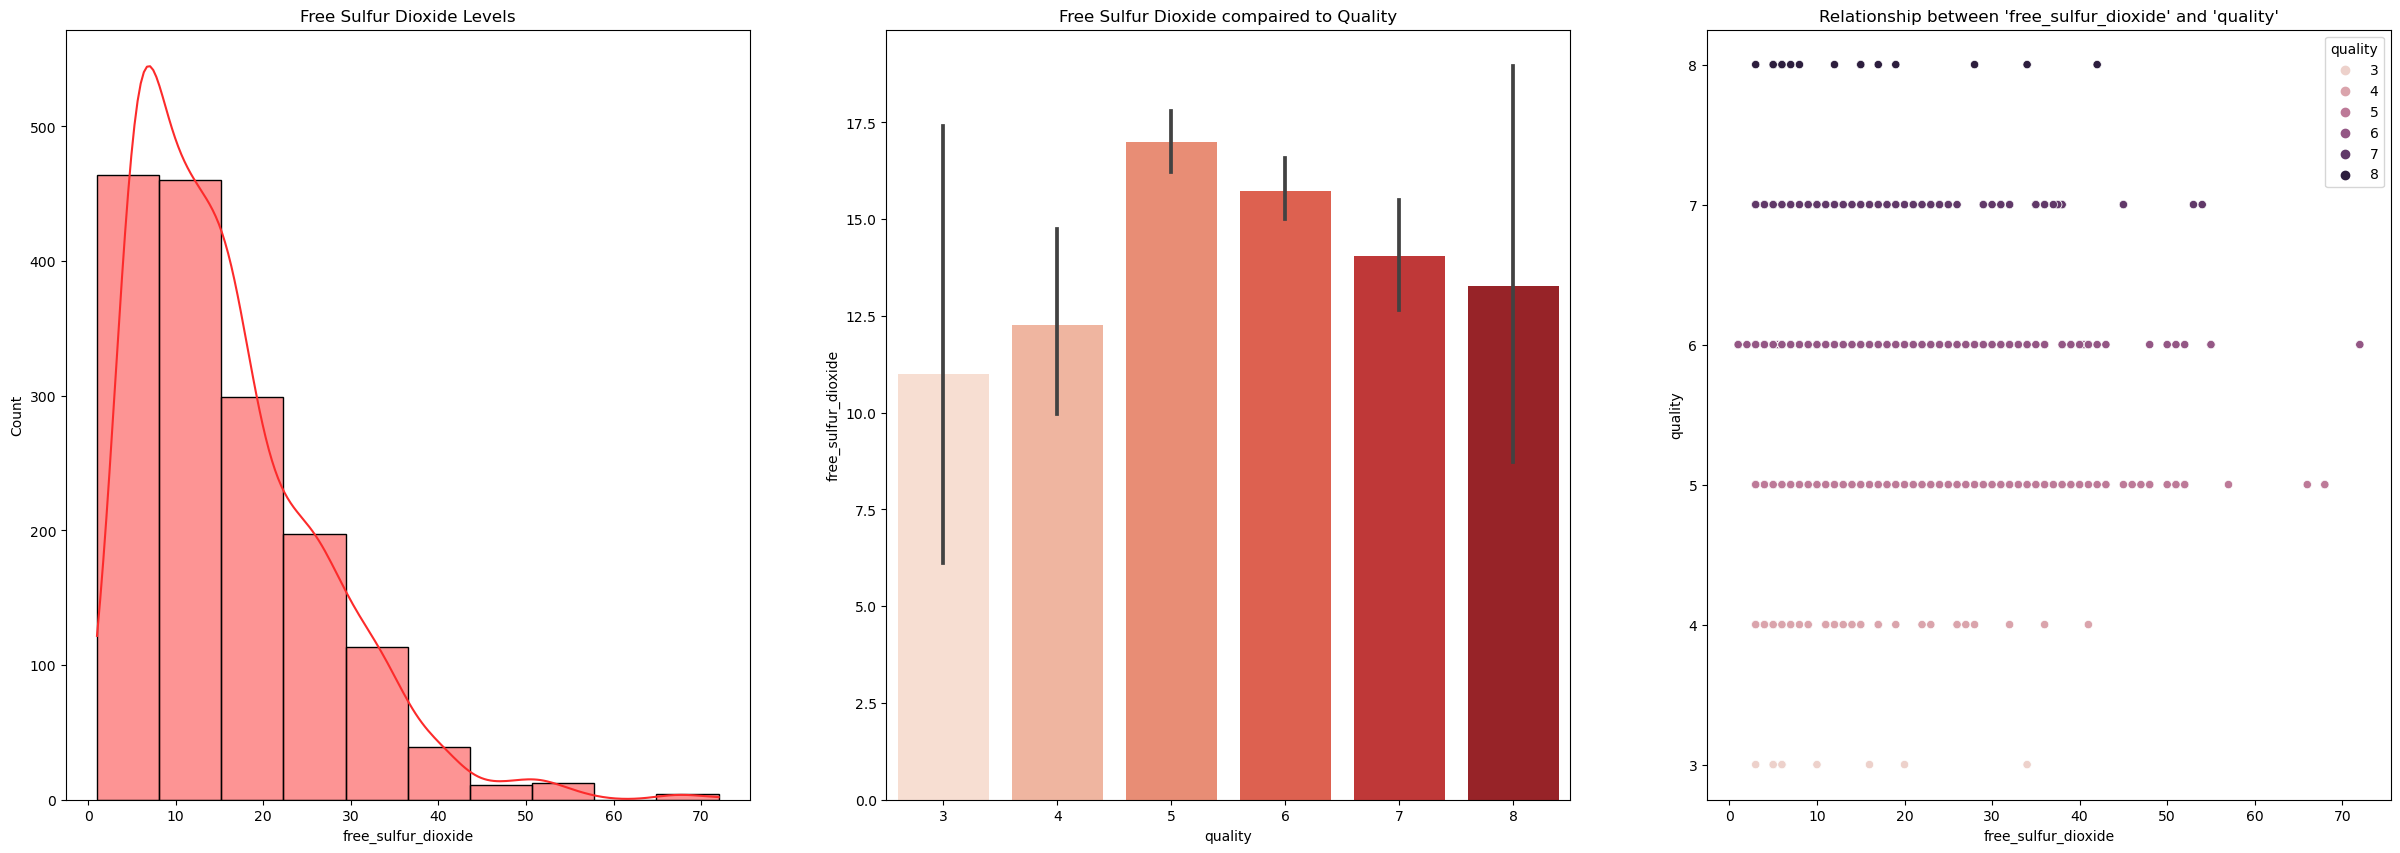

In [15]:
#Free Sulfur Dioxide count of distribution levels and when compaired to quality

fig, axes = plt.subplots(1, 3, figsize = (30, 10))

sns.histplot(ax = axes[0], x = wine['free_sulfur_dioxide'],
             bins = 10,
             kde = True,
             cbar = True,
             color = "#FC2B2B").set(title = "Free Sulfur Dioxide Levels");

sns.barplot(ax = axes[1], x = 'quality', 
            y = 'free_sulfur_dioxide', 
            data = wine , 
            palette = "Reds").set(title = "Free Sulfur Dioxide compaired to Quality");

sns.scatterplot(ax = axes[2],
                x = "free_sulfur_dioxide",
                y = "quality", hue = "quality",
                data = wine).set(title = "Relationship between 'free_sulfur_dioxide' and 'quality'");

#Free Sulfur Dioxide levels dont show much difference compaired to the wine quality 

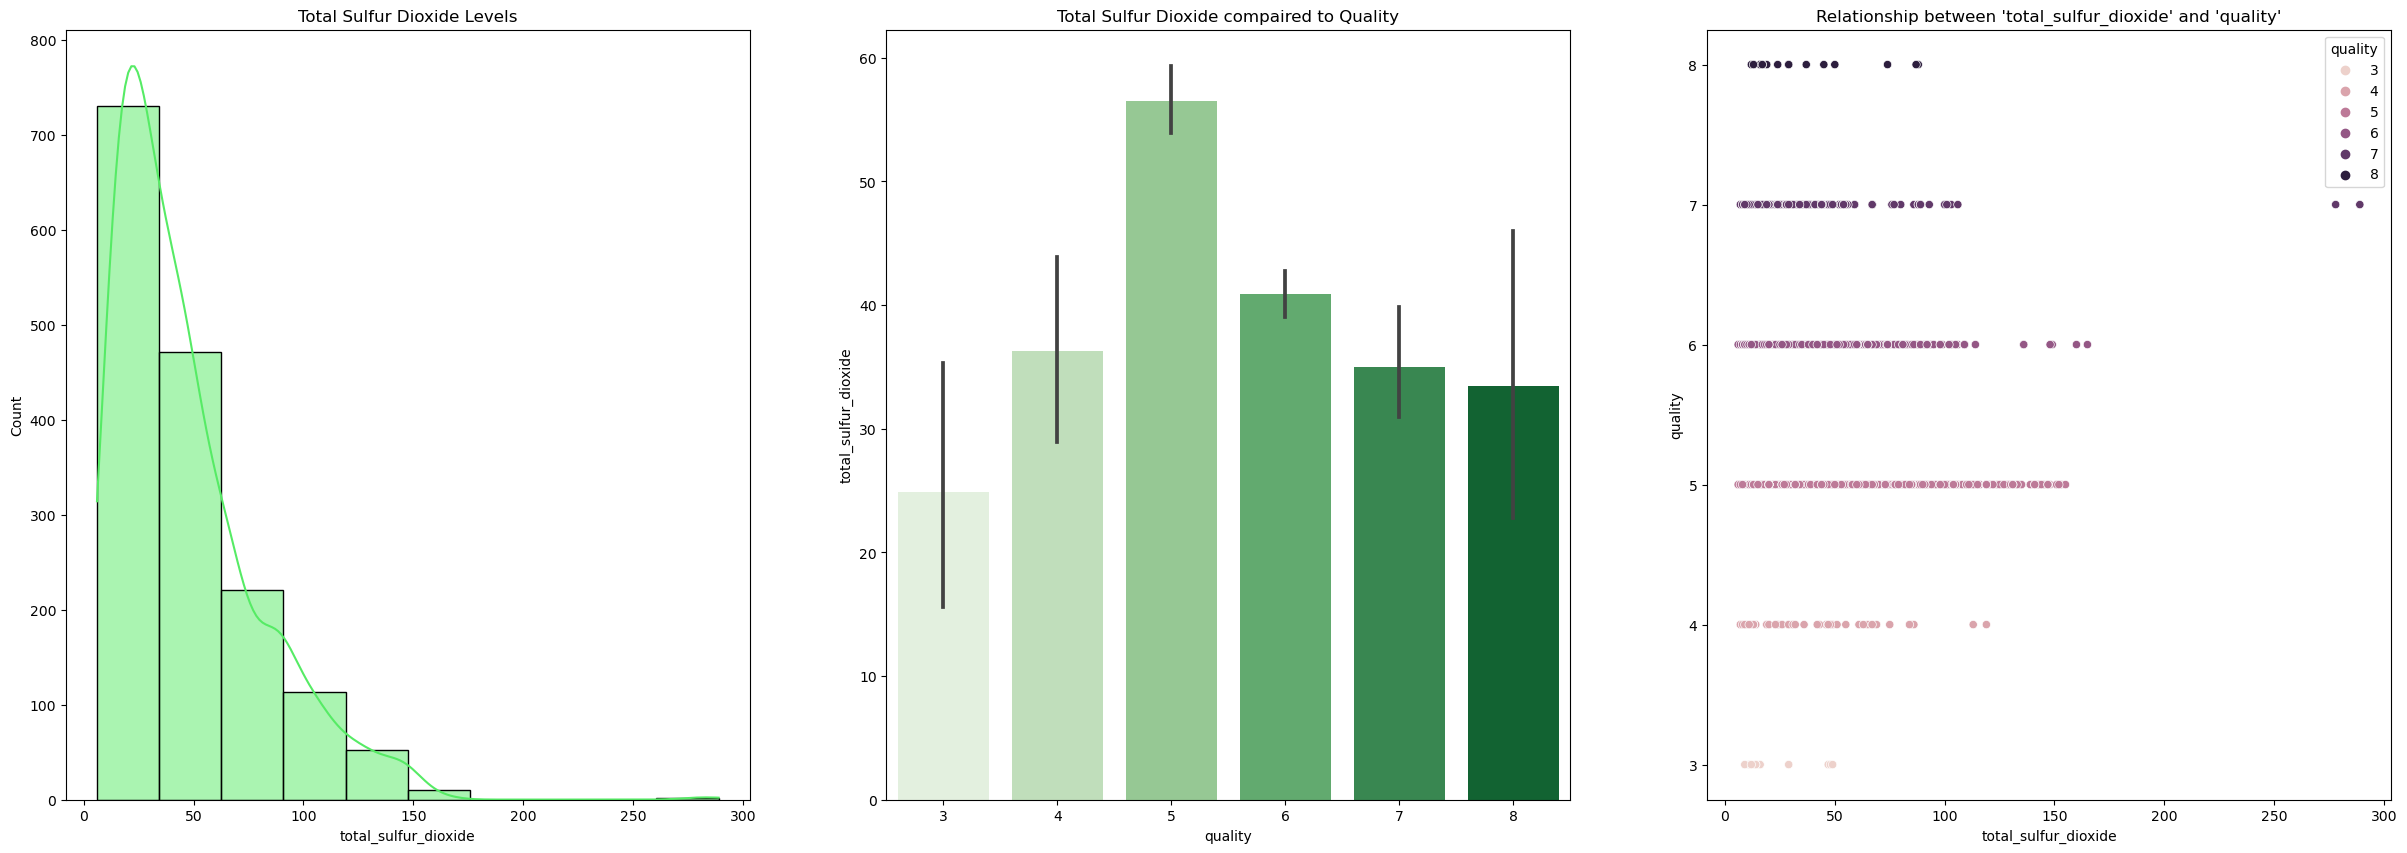

In [16]:
#Total Sulfur Dioxide count of distribution levels and when compaired to quality

fig, axes = plt.subplots(1, 3, figsize = (30, 10))

sns.histplot(ax = axes[0], x = wine['total_sulfur_dioxide'],
             bins = 10,
             kde = True,
             cbar = True,
             color = "#56EB65").set(title = "Total Sulfur Dioxide Levels");

sns.barplot(ax = axes[1], x = 'quality', 
            y = 'total_sulfur_dioxide', 
            data = wine , 
            palette = "Greens").set(title = "Total Sulfur Dioxide compaired to Quality");

sns.scatterplot(ax = axes[2],
                x = "total_sulfur_dioxide",
                y = "quality", hue = "quality",
                data = wine).set(title = "Relationship between 'total_sulfur_dioxide' and 'quality'");

#Total Sulfur Dioxide levels dont show much difference compaired to the wine quality 

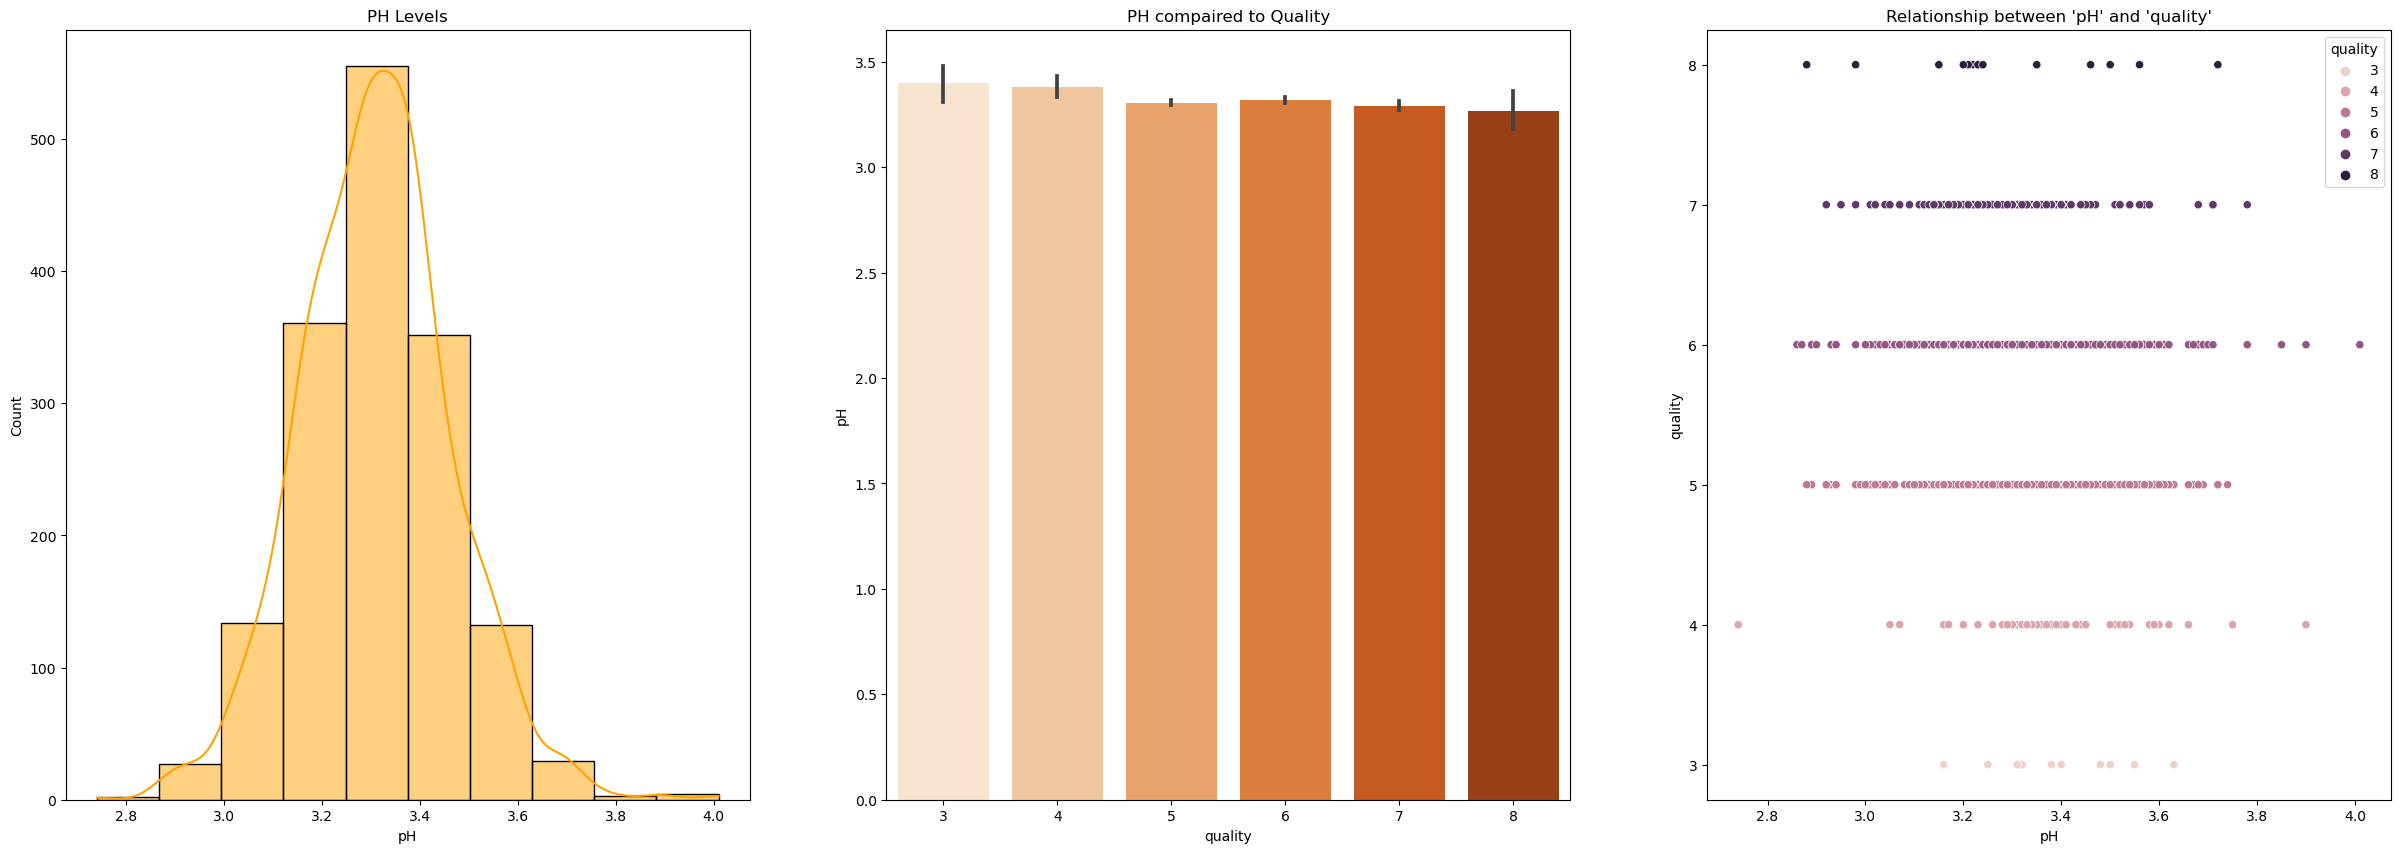

In [17]:
#PH count of distribution levels and when compaired to quality

fig, axes = plt.subplots(1, 3, figsize = (30, 10))

sns.histplot(ax = axes[0], x = wine['pH'],
             bins = 10,
             kde = True,
             cbar = True,
             color = "#FFA200").set(title = "PH Levels");

sns.barplot(ax = axes[1], x = 'quality', 
            y = 'pH', 
            data = wine , 
            palette = "Oranges").set(title = "PH compaired to Quality");

sns.scatterplot(ax = axes[2],
                x = "pH",
                y = "quality", hue = "quality",
                data = wine).set(title = "Relationship between 'pH' and 'quality'");

#PH levels slightly decrease compaired to the wine quality 

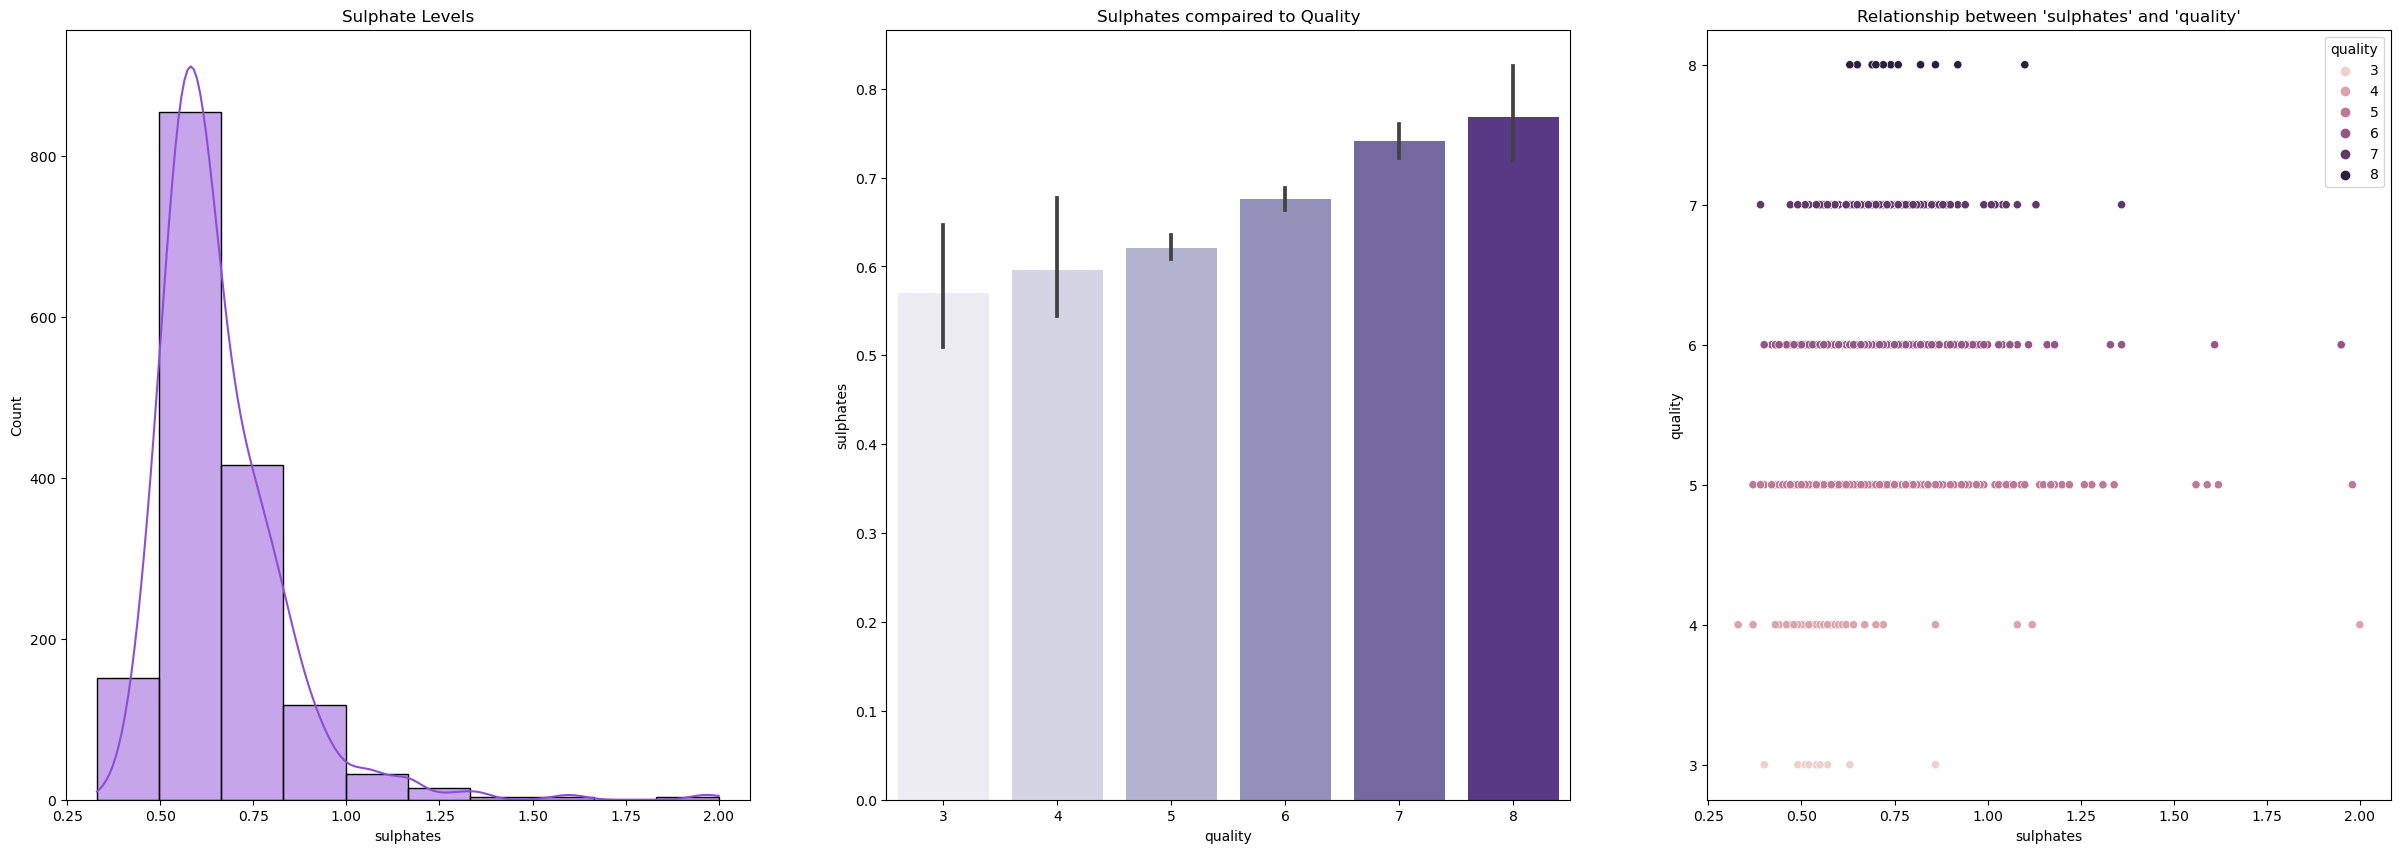

In [18]:
#Sulphates count of distribution levels and when compaired to quality

fig, axes = plt.subplots(1, 3, figsize = (30, 10))

sns.histplot(ax = axes[0], x = wine['sulphates'],
             bins = 10,
             kde = True,
             cbar = True,
             color = "#8E4DD8").set(title = "Sulphate Levels");

sns.barplot(ax = axes[1], x = 'quality', 
            y = 'sulphates', 
            data = wine , 
            palette = "Purples").set(title = "Sulphates compaired to Quality");

sns.scatterplot(ax = axes[2],
                x = "sulphates",
                y = "quality", hue = "quality",
                data = wine).set(title = "Relationship between 'sulphates' and 'quality'");

#Sulphates levels go higher when compaired to the wine quality 

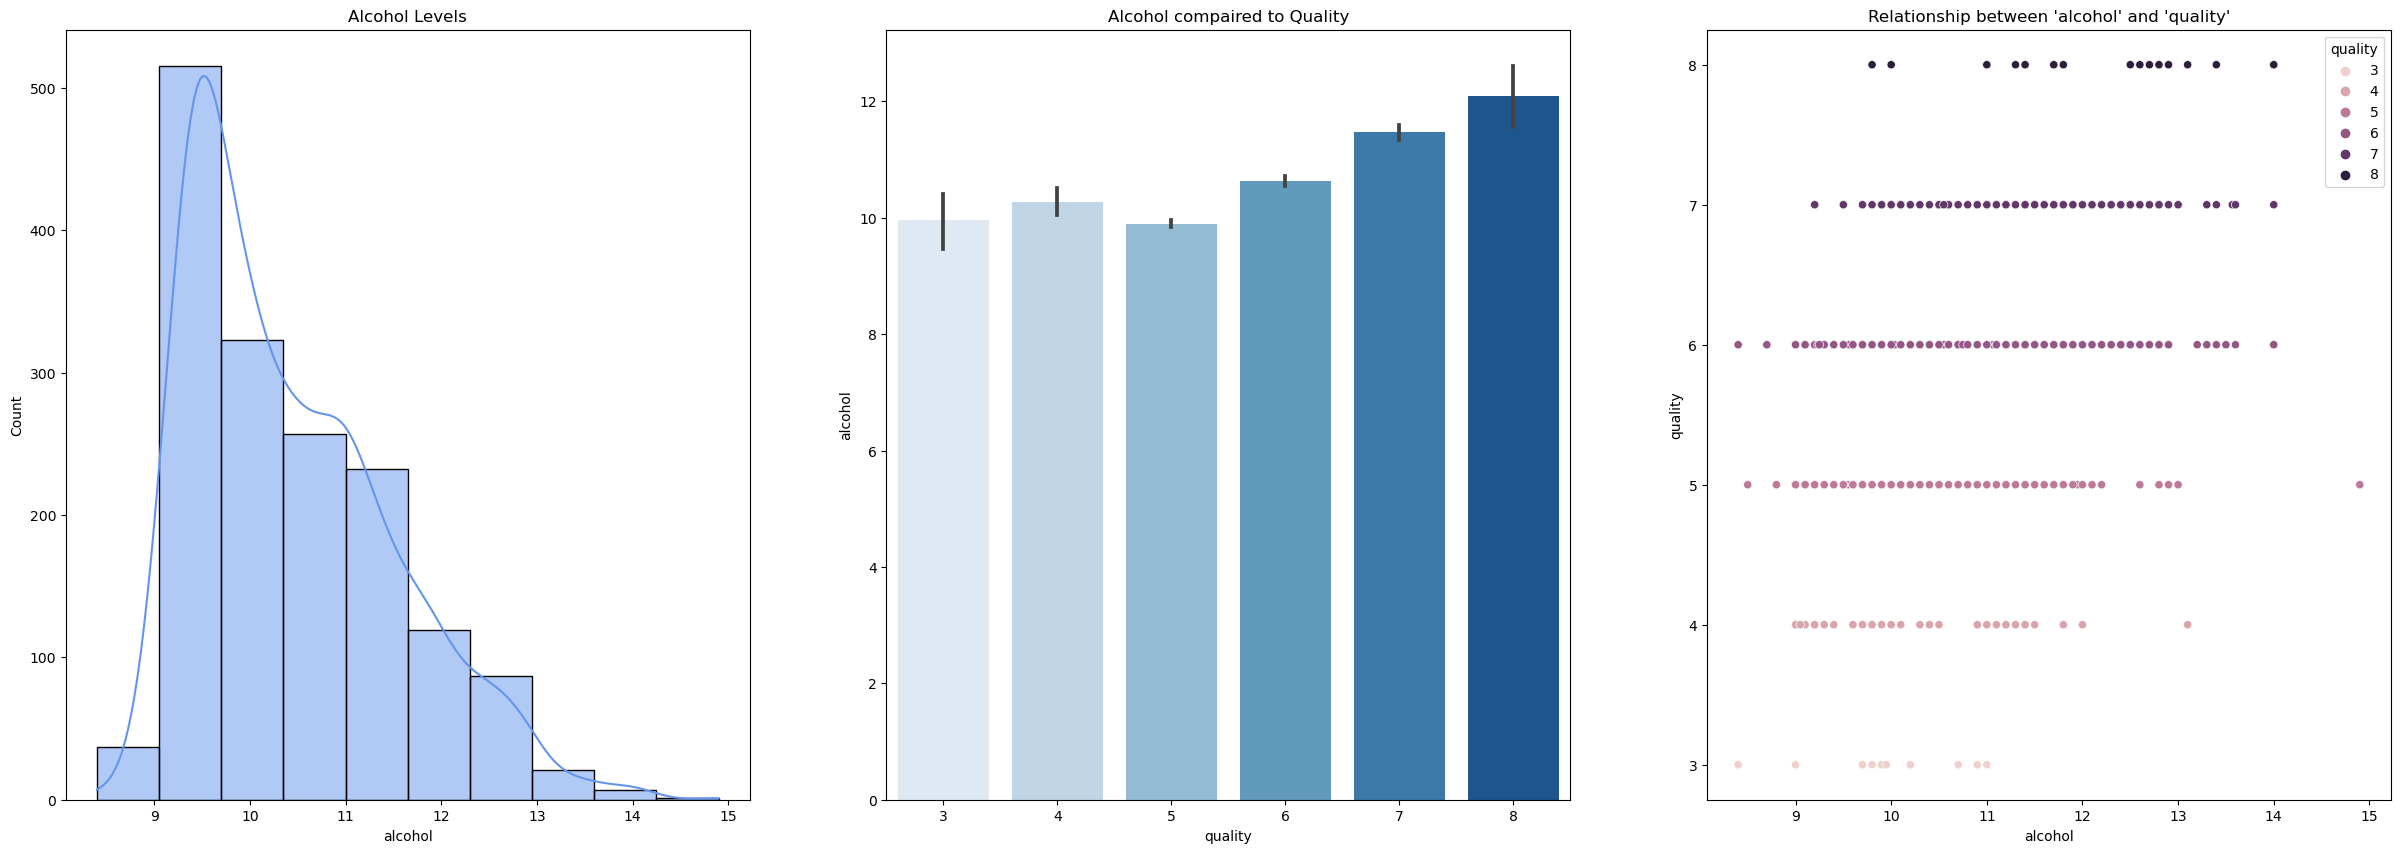

In [19]:
#Alcohol count of distribution levels and when compaired to quality

fig, axes = plt.subplots(1, 3, figsize = (30, 10))

sns.histplot(ax = axes[0], x = wine['alcohol'],
             bins = 10,
             kde = True,
             cbar = True,
             color = "#6495ED").set(title = "Alcohol Levels");

sns.barplot(ax = axes[1], x = 'quality', 
            y = 'alcohol', 
            data = wine , 
            palette = "Blues").set(title = "Alcohol compaired to Quality");

sns.scatterplot(ax = axes[2],
                x = "alcohol",
                y = "quality", hue = "quality",
                data = wine).set(title = "Relationship between 'alcohol' and 'quality'");

#Alcohol levels go slightly higher when compaired to the wine quality 

In [20]:
#Data Prosessing Stage

In [21]:
#Understading the data before processing

wine.describe().T.style.background_gradient(axis=0)

,count,mean,std,min,25%,50%,75%,max
fixed_acidity,1599.000000,8.319637,1.741096,4.600000,7.100000,7.900000,9.200000,15.900000
volatile_acidity,1599.000000,0.527821,0.179060,0.120000,0.390000,0.520000,0.640000,1.580000
citric_acid,1599.000000,0.270976,0.194801,0.000000,0.090000,0.260000,0.420000,1.000000
residual_sugar,1599.000000,2.538806,1.409928,0.900000,1.900000,2.200000,2.600000,15.500000
chlorides,1599.000000,0.087467,0.047065,0.012000,0.070000,0.079000,0.090000,0.611000
free_sulfur_dioxide,1599.000000,15.874922,10.460157,1.000000,7.000000,14.000000,21.000000,72.000000
total_sulfur_dioxide,1599.000000,46.467792,32.895324,6.000000,22.000000,38.000000,62.000000,289.000000
density,1599.000000,0.996747,0.001887,0.990070,0.995600,0.996750,0.997835,1.003690
pH,1599.000000,3.311113,0.154386,2.740000,3.210000,3.310000,3.400000,4.010000
sulphates,1599.000000,0.658149,0.169507,0.330000,0.550000,0.620000,0.730000,2.000000


In [22]:
#Checking the quantity of data values in each wine quality level

wine['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [23]:
#Making binary classificaion for the response variable.

#Dividing wine as Good and Bad by giving the limit for the quality according to wine quality values.

bins = (2, 6, 8)
group_names = ['Bad', 'Good']
wine['quality'] = pd.cut(wine['quality'], bins = bins, labels = group_names)
wine['quality'].unique()

['Bad', 'Good']
Categories (2, object): ['Bad' < 'Good']

In [24]:
#Applying the quality variable labels

label_quality = LabelEncoder()

In [25]:
#Bad transforms to 0 and Good transforms to 1 

wine['quality'] = label_quality.fit_transform(wine['quality'])

In [26]:
wine['quality'].value_counts()

quality
0    1382
1     217
Name: count, dtype: int64

<Axes: xlabel='quality', ylabel='count'>

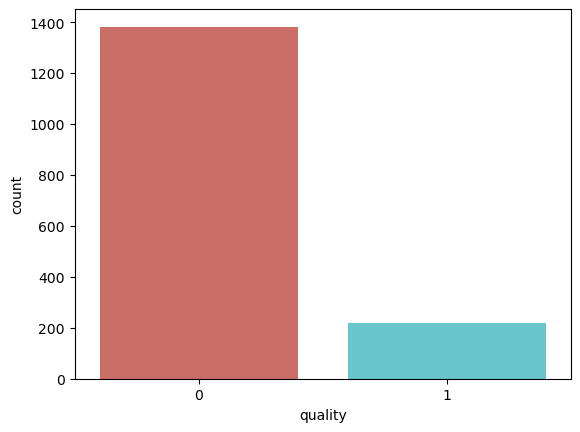

In [27]:
#Lets see the seperated groups

sns.countplot(x = 'quality', data = wine, palette = 'hls')

In [28]:
#Data Training Part 

In [29]:
#Selecting Dependent and Independent Variables

X = wine.drop('quality', axis = 1)
y = wine['quality']

In [30]:
#Train and Test Data Splitting

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [31]:
#To achieve the best result, utilizing the standard scaling.

sc = StandardScaler()

In [32]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [33]:
print(X_train[0:15])
print(X_train.shape)

print(X_test[0:15])
print(X_test.shape)

[[ 2.18331636e-01  8.89712006e-01  1.92092221e-01  3.09725630e-01
  -4.96420818e-02  6.91006925e-01  1.04293362e+00  1.84669643e+00
   1.09349989e+00  4.58222839e-01  1.12317723e+00]
 [-1.29016623e+00 -1.78878251e+00  6.52753380e-01 -8.05079628e-01
  -4.55213609e-01  2.38847304e+00  3.59387025e+00 -3.00449133e+00
  -4.00438725e-01 -4.01196964e-01  1.40827174e+00]
 [ 1.49475291e+00 -7.84347068e-01  1.01104539e+00 -5.26378313e-01
   5.99272362e-01 -9.57960157e-01 -9.91742029e-01  7.68654707e-01
  -7.56694610e-02  5.15517493e-01 -5.87389780e-01]
 [ 2.76350785e-01  8.61811021e-01 -6.38306444e-02 -6.65728970e-01
  -9.08492906e-03  1.20204793e-02 -7.18427390e-01  8.94884206e-02
   5.42382446e-02 -1.08873281e+00 -9.67515783e-01]
 [ 4.42741900e-02  2.81487994e+00 -6.26860949e-01  2.39998549e+00
  -3.13263575e-01 -4.72969839e-01  2.22989700e-01  1.19987140e+00
   3.79007509e-01 -9.74143500e-01 -4.92358280e-01]
 [-7.17641072e-02 -7.84347068e-01  1.11341454e+00 -1.78001670e-01
   2.13979411e-01  

In [34]:
print(y_train[0:15])
print(y_train.shape)
print(y_test[0:15])
print(y_train.shape)

493     0
354     0
342     0
834     0
705     0
522     0
1590    0
1404    0
1055    0
277     0
1239    0
948     1
792     0
236     0
669     0
Name: quality, dtype: int32
(1279,)
803     0
124     0
350     0
682     0
1326    0
976     0
1493    0
706     0
613     0
1587    0
513     1
1505    0
1525    0
1568    0
220     0
Name: quality, dtype: int32
(1279,)


In [35]:
#Developing Models for Classification 

In [36]:
#Logistic Regression Classifier

In [40]:
# Create a Logistic Regression model
lr = LogisticRegression(solver='lbfgs', multi_class='multinomial')

# Fit the model with training data
lr.fit(X_train, y_train)

print ("Train Accuracy -", lr.score(X_train, y_train))
print ("Test Accuracy -", lr.score (X_test, y_test))

# Make predictions using the testing data
pred_lr = lr.predict(X_test)

pred_proba_lr = lr.predict_proba(X_test)

Train Accuracy - 0.8850664581704457
Test Accuracy - 0.875


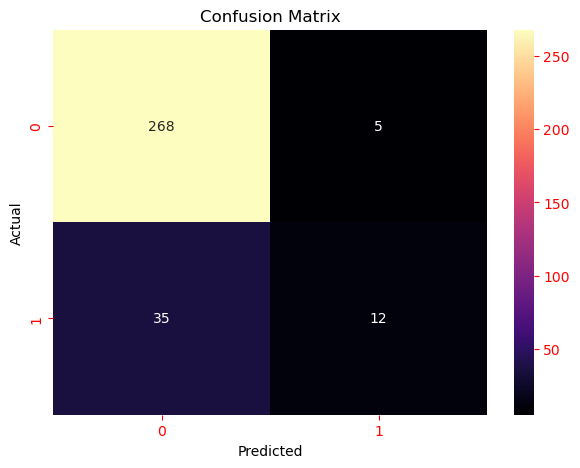

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.37        47

    accuracy                           0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320



In [39]:
#y_test contains the true labels for X_test
y_pred = pred_lr

#Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.rcParams['xtick.color'] = 'red'
plt.rcParams['ytick.color'] = 'red'

#Plot the confusion matrix using seaborn
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='magma')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
print(classification_report(y_test, pred_lr))

In [1612]:
#-----------Logistic Regression gets 86%

In [1613]:
#Random Forest Classifier 

In [41]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

print ("Train Accuracy -", rfc.score(X_train, y_train))
print ("Test Accuracy -", rfc.score (X_test, y_test))

Train Accuracy - 1.0
Test Accuracy - 0.884375


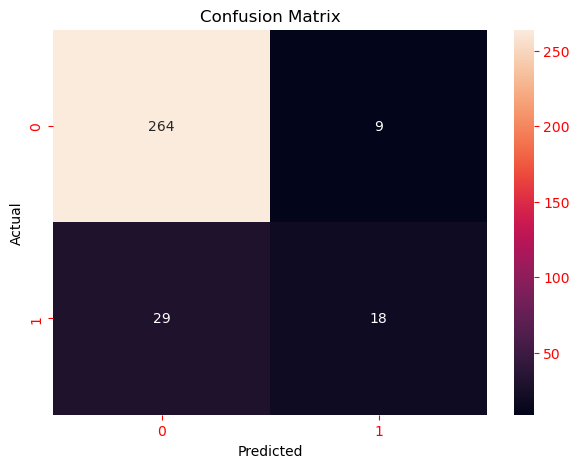

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       273
           1       0.67      0.38      0.49        47

    accuracy                           0.88       320
   macro avg       0.78      0.68      0.71       320
weighted avg       0.87      0.88      0.87       320



In [1615]:
#that y_test contains the true labels for X_test
y_pred = pred_rfc

cm = confusion_matrix(y_test, y_pred)
plt.rcParams['xtick.color'] = 'red'
plt.rcParams['ytick.color'] = 'red'
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
print(classification_report(y_test, pred_rfc))

In [1616]:
#-----------Random Forest classifier gets 87%

In [1617]:
#Support Vector Classifier

In [42]:
svc = SVC()
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)

print ("Train Accuracy -", svc.score(X_train, y_train))
print ("Test Accuracy -", svc.score (X_test, y_test))

Train Accuracy - 0.8991399530883503
Test Accuracy - 0.875


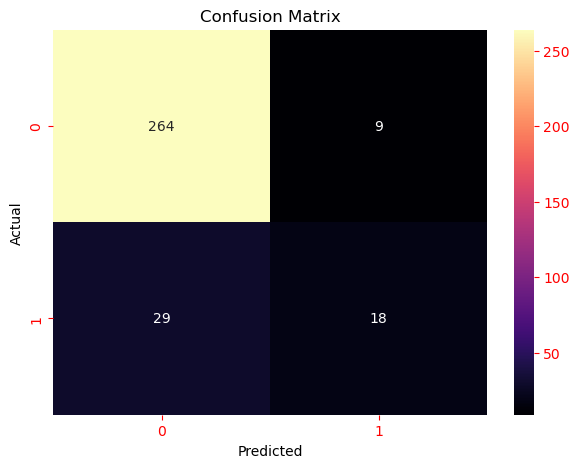

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.37        47

    accuracy                           0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320



In [1619]:
y_pred = pred_rfc

cm = confusion_matrix(y_test, y_pred)
plt.rcParams['xtick.color'] = 'red'
plt.rcParams['ytick.color'] = 'red'
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='magma')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
print(classification_report(y_test, pred_svc))

In [1620]:
#-----------Support Vector classifier gets 88%

In [1621]:
#Increasing the accuracy of models 

In [1622]:
#Applying Grid search CV for Support Vector Machine Model

param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc = GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=10)

In [1623]:
grid_svc.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [1624]:
#Utilizing the optimal parameters for the svc model

print('Tuned Hyper Parameters for SVC = ', grid_svc.best_params_)

Tuned Hyper Parameters for SVC =  {'C': 1.2, 'gamma': 0.9, 'kernel': 'rbf'}


Train Accuracy - 0.9827990617670055
Test Accuracy - 0.896875


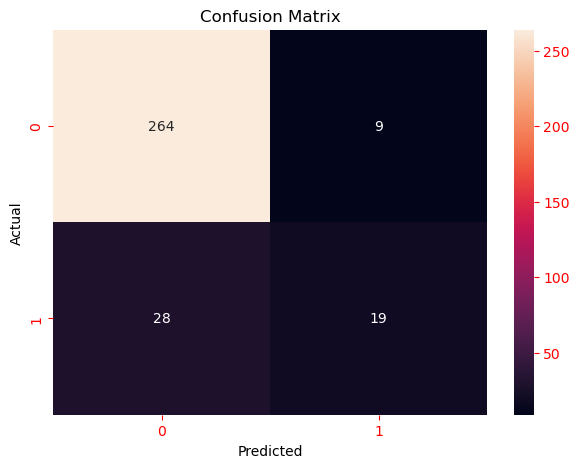

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       273
           1       0.89      0.34      0.49        47

    accuracy                           0.90       320
   macro avg       0.89      0.67      0.72       320
weighted avg       0.90      0.90      0.88       320



In [43]:
#Using ideal parameters and testing SVC model again.

svc2 = SVC(C = 1.2, gamma =  0.9, kernel= 'rbf')
svc2.fit(X_train, y_train)
pred_svc2 = svc2.predict(X_test)

print ("Train Accuracy -", svc2.score(X_train, y_train))
print ("Test Accuracy -", svc2.score (X_test, y_test))

y_pred = pred_rfc

cm = confusion_matrix(y_test, y_pred)
plt.rcParams['xtick.color'] = 'red'
plt.rcParams['ytick.color'] = 'red'
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
print(classification_report(y_test, pred_svc2))

In [44]:
#-----------Support Vector classifier gets improved to 90%